## ***Introduction To Normal Equation, SVD and GD***

We know that the most common performance measure
of a regression model is the Root Mean Square Error (RMSE).
Therefore, to train a Linear Regression model, you need to find the value of $\boldsymbol{\theta}$ that minimizes
the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE) than the RMSE, and it leads to the same result.

The MSE of a Linear Regression hypothesis  $h_{\boldsymbol{\theta}}$ on a training set $\mathbf{X}$ is calculated using:

$$\operatorname{MSE}\left(\mathbf{X}, h_{\boldsymbol{\theta}}\right)=\frac{1}{m} \sum_{i=1}^{m}\left(\boldsymbol{\theta}^{T} \mathbf{x}^{(i)}-y^{(i)}\right)^{2}$$

we write $h_{\boldsymbol{\theta}}$ instead of just $h$ in order to make it clear that
the model is parametrized by the vector $\boldsymbol{\theta}$. To simplify notations, we will just write
$\operatorname{MSE}\left(\boldsymbol{\theta}\right)$ instead of $\operatorname{MSE}\left(\mathbf{X}, h_{\boldsymbol{\theta}}\right)$.

Two approches to minimize $\operatorname{MSE}$:

- a direct "closed-form" equation (Normal equation and SVD)

- Gradient Descent (GD); an iterative optimization approach

**The Normal Equation**

To find the value of $\boldsymbol{\theta}$ that minimizes the cost function, there is a closed-form solution—in other words, a mathematical equation that gives the result directly. This is called the <font color='blue'> Normal Equation</font>:

$$\widehat{\boldsymbol{\theta}}=\left(\mathbf{X}^{T} \mathbf{X}\right)^{-1} \mathbf{X}^{T} \mathbf{y}$$

- $\widehat{\boldsymbol{\theta}}$ is the value of $\boldsymbol{\theta}$ that minimizes the cost function.
- $\mathbf{y}$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$.

***
***
To understand this equation, we can consider a special case when $\mathbf{X}$ is square matrix and  $\mathbf{X}$ is  invertible (so $\mathbf{X}^{T}$ is invertible ):
$$\widehat{\boldsymbol{\theta}}=\left(\mathbf{X}^{T} \mathbf{X}\right)^{-1} \mathbf{X}^{T} \mathbf{y}$$
$$\Downarrow$$
$$\mathbf{X}^{T} \mathbf{X} \widehat{\boldsymbol{\theta}}= \mathbf{X}^{T} \mathbf{y}$$
$$\Downarrow$$
$$\mathbf{X} \widehat{\boldsymbol{\theta}}= \mathbf{y}$$


(To remind) from chaper 2:

$$\mathbf{X}=\left[\begin{array}{c}
\left(\mathbf{x}^{(1)}\right)^{T} \\
\left(\mathbf{x}^{(2)}\right)^{T} \\
\vdots \\
\left(\mathbf{x}^{(m-1)}\right)^{T} \\
\left(\mathbf{x}^{(m)}\right)^{T}
\end{array}\right]$$

<font color='blue'> **So the general problem is a linear equation:**</font>

$$\left[\begin{array}{cccc}
x_{0}^{(1)} & x_{1}^{(1)} & \cdots & x_{n}^{(1)} \\
x_{0}^{(2)} & x_{1}^{(2)} & \cdots & x_{n}^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
x_{0}^{(m)} & x_{1}^{(m)} & \cdots & x_{n}^{(m)}
\end{array}\right]_{m\times(n+1)}\left[\begin{array}{c}
\hat{\theta}_{0} \\
\hat{\theta}_{1} \\
\vdots \\
\hat{\theta}_{n}
\end{array}\right]_{(n+1)\times 1}=\left[\begin{array}{c}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)}
\end{array}\right]_{m \times 1}$$

Three possible situations:

- $m < (n+1)$; The equation is <font color='blue'> under-determined</font>.
- $m=n+1$; it is $m$ equations and $m$ unknowns variables. The equation is <font color='blue'> well-determined</font>.
- $m > (n+1) $ The equation is <font color='blue'> over-determined</font>.


Performing linear regression using Scikit-Learn is quite simple

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the
name stands for "least squares").

`numpy.linalg.lstsq`

`numpy.linalg.lstsq(a, b, rcond='warn')`

Return the least-squares solution to a linear matrix equation.

Solves the equation <font color='blue'> $a x = b$ </font>by computing a vector <font color='blue'>$x$ </font> that minimizes the squared Euclidean 2-norm <font color='blue'> $\| b - a x \|^2_2$</font>. The equation may be under-, well-, or over-determined (i.e., the number of linearly independent rows of $a$ can be less than, equal to, or greater than its number of linearly independent columns). If $a$ is square and of full rank, then $x$ (but for round-off error) is the “exact” solution of the equation.

https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html

**CAUTION:**

Our equation is $\mathbf{X} \widehat{\boldsymbol{\theta}}= \mathbf{y}$, so 

- $a$ is $\mathbf{X}$, 
- $x$ is $\widehat{\boldsymbol{\theta}}$ 
- and $b$ is $\mathbf{y}$

This function computes $\widehat{\boldsymbol{\theta}}=\mathbf{X}^{+} \mathbf{y}$, $\mathbf{X}^{+}$ is the <font color='blue'> pseudoinverse</font> of $\mathbf{X}$ (specifically the
Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse
directly.

The pseudoinverse itself is computed using a standard matrix factorization technique
called <font color='blue'> Singular Value Decomposition (SVD)</font>:

$$\begin{array}{cccc}
\mathbf{X} & = & \mathbf{U} & \mathbf{\Sigma} & \mathbf{V}^{T} \\
m \times n & & m \times m & m \times n & n \times n
\end{array}$$


Where $\mathbf{U}$ and $\mathbf{V}$ are orthogonal matrices ($\mathbf{U}^{T}\mathbf{U}=I_{m\times m}$, $\mathbf{V}^{T}\mathbf{V}=I_{n\times n}$) and $\mathbf{\Sigma}$ is a diagonal matrix where the diagonal entries are known as singular values. (For consistency with our problem, n should be n+1 but form is more consistent with the linear algebra literature!)

The pseudoinverse is computed as:

$$\mathbf{X}^{+}=\mathbf{V} \quad \mathbf{\Sigma}^{+} \quad \mathbf{U}^{\mathrm{T}}$$

To compute the matrix $\mathbf{\Sigma}^{+}$, the algorithm takes $\mathbf{\Sigma}$ and sets to zero all values smaller than a tiny
threshold value, then it replaces all the non-zero values with their inverse, and finally it transposes the resulting matrix.

$$\mathbf{\Sigma}^{+}=\left\{\begin{array}{cl}
1 / \sigma_{i} & \text { if } \sigma_{i}>t \\
0 & \text { otherwise }
\end{array}\right.$$


<font color='blue'> This approach (SVD) is more efficient than computing the
Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix $\mathbf{X}^{\mathrm{T}} \mathbf{X}$ is not invertible (i.e., singular), such as if **m < n** or if some features are **redundant**, but the pseudoinverse is always defined. </font>

## Gradient Descent

<font color='blue'> Gradient Descent</font> is a very <font color='blue'> generic optimization algorithm</font> capable of finding optimal solutions to a wide range of problems.

Suppose you are lost in the mountains in a dense fog; you can only feel the slope of the ground below your feet. 
A good strategy to get to the bottom of the valley quickly
is to go downhill in the direction of the steepest slope. 

This is exactly what Gradient Descent does: 
- <font color='blue'> it measures the local gradient of the error function with regards to the parameter vector $\boldsymbol{\theta}$, 
- and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!</font>

***


>Gradient descent is also known as **steepest descent**; but gradient descent should not be confused with the method of steepest descent for approximating integrals. (from wikipedia)    
    
</div>

***

Concretely, 

- you <font color='blue'>  start by filling $\boldsymbol{\theta}$ with random values </font> (this is called <font color='blue'> random initialization</font>),

- and then you <font color='blue'> improve it gradually, taking one baby step at a time, each step
attempting to decrease the cost function</font> (e.g., the MSE), until the algorithm converges to a minimum

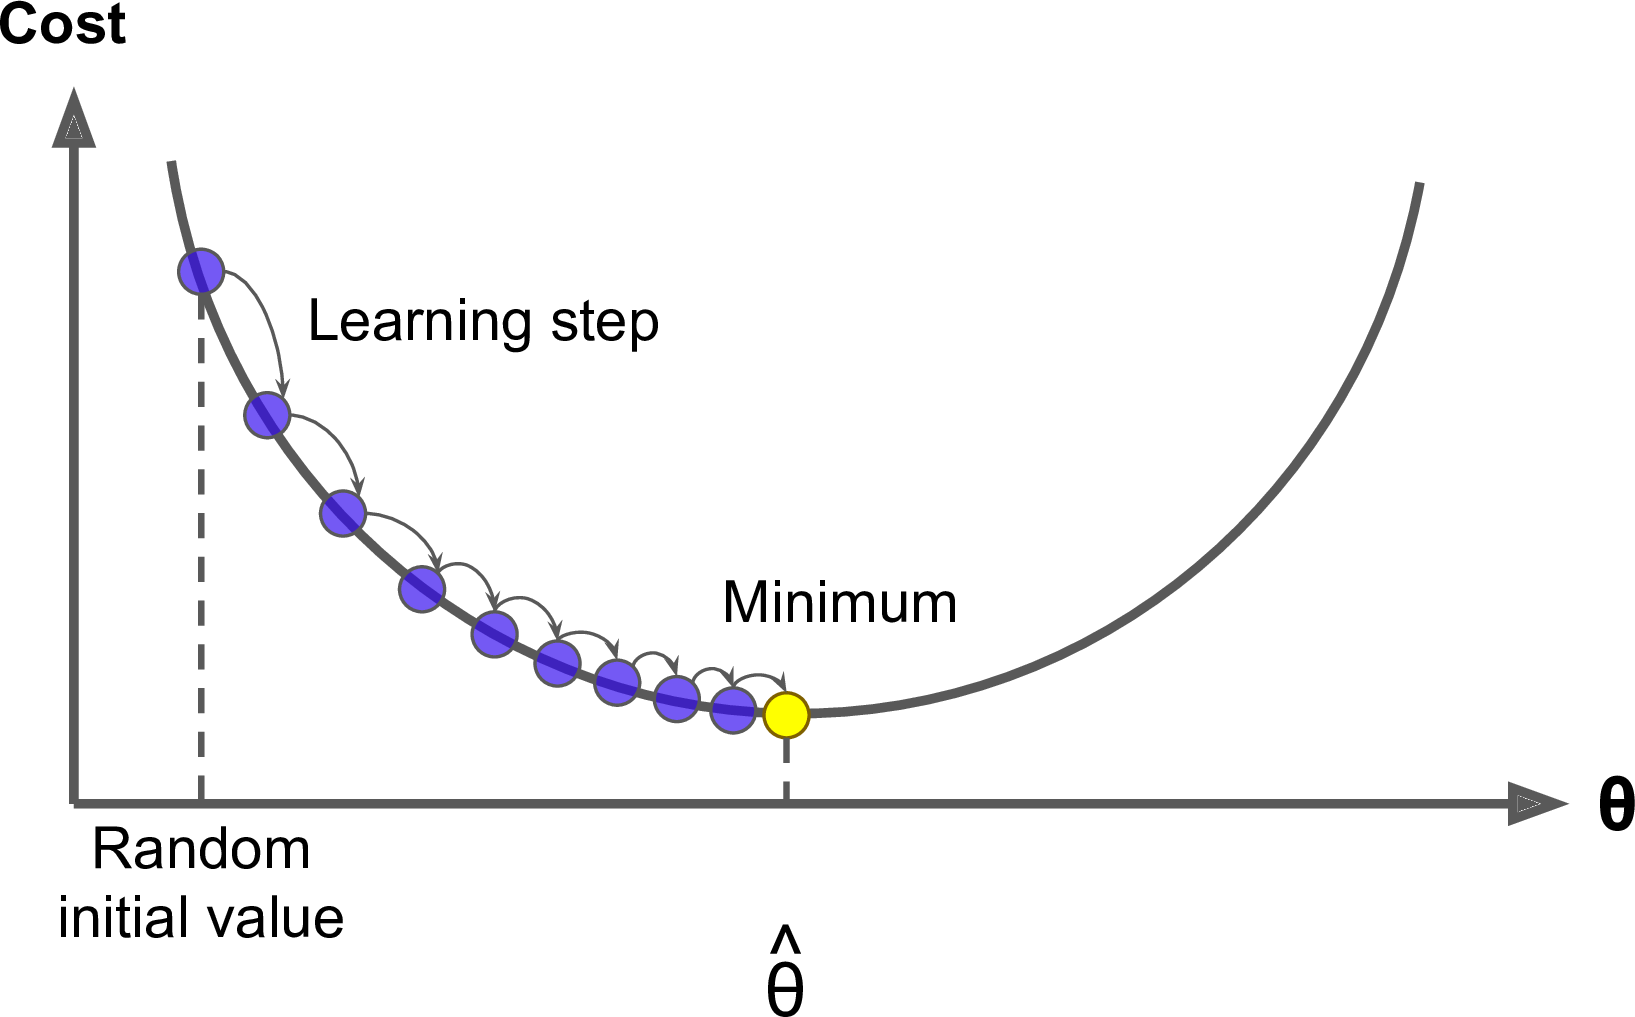

An <font color='blue'> important parameter in Gradient Descent</font> is the <font color='blue'> **size of the steps**</font>, determined by the <font color='blue'> **learning rate hyperparameter**</font>. If the <font color='blue'> learning rate is  **too small**</font>, then the algorithm
will have to go through many iterations to converge, which will take a <font color='blue'> long time</font>.
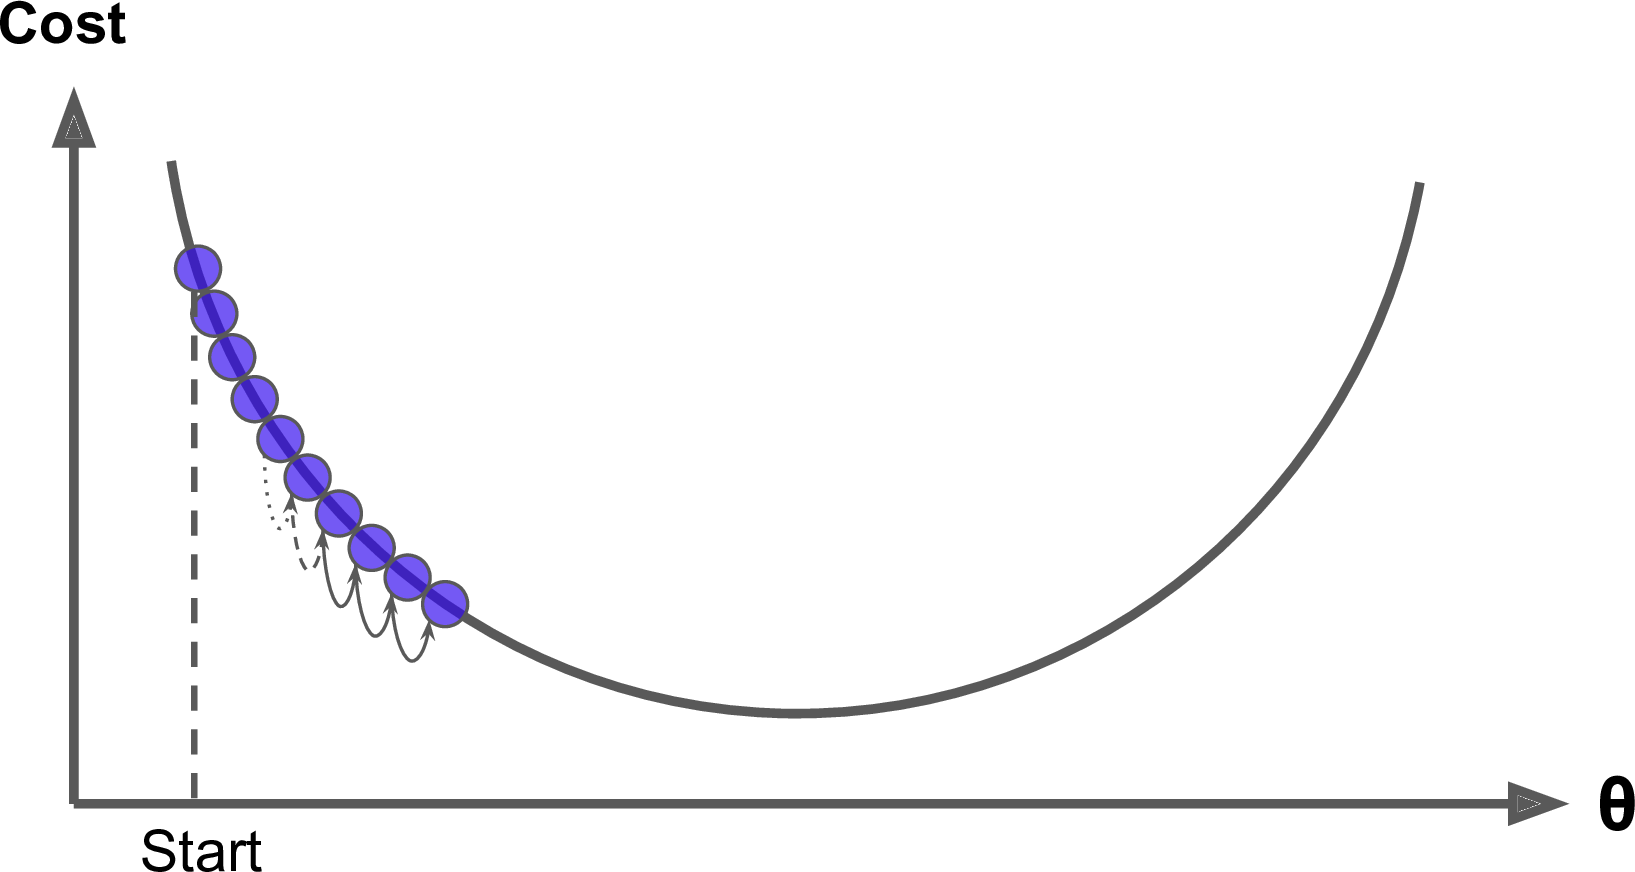

On the other hand, if the <font color='blue'> learning rate is **too high**</font>, you might <font color='blue'> **jump across the valley**</font>
and end up on the other side, possibly even higher up than you were before. This might make the <font color='blue'> algorithm diverge</font>, with larger and larger values, failing to find a good
solution.

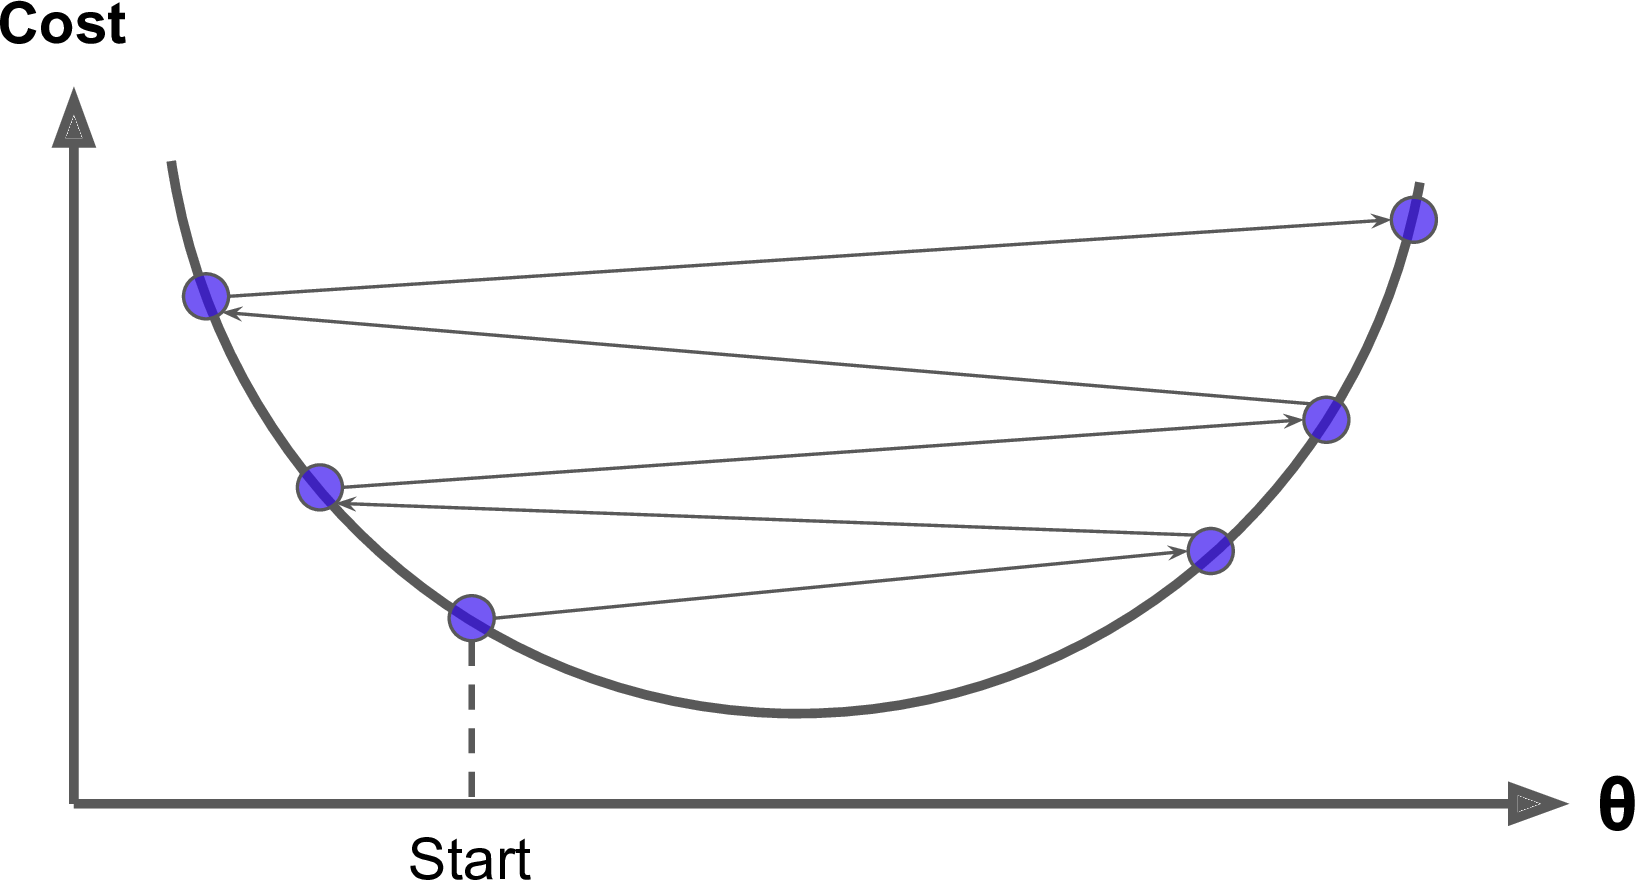

Finally, not all cost functions look like nice regular bowls. There may be <font color='blue'> holes, ridges, plateaus</font>, and all sorts of irregular terrains, <font color='blue'> making convergence to the minimum very
difficult</font>. 

The figure shows the **two main challenges with Gradient Descent**:
- if the <font color='blue'> random initialization starts</font> the algorithm <font color='blue'> on the left</font>, then it will converge to <font color='blue'> **a local minimum**</font>,
which is not as good as the global minimum. 

- If it <font color='blue'> starts on the right</font>, then it will
take a very long time to cross the <font color='blue'>**plateau**</font>, and if you stop too early you will never reach the global minimum.
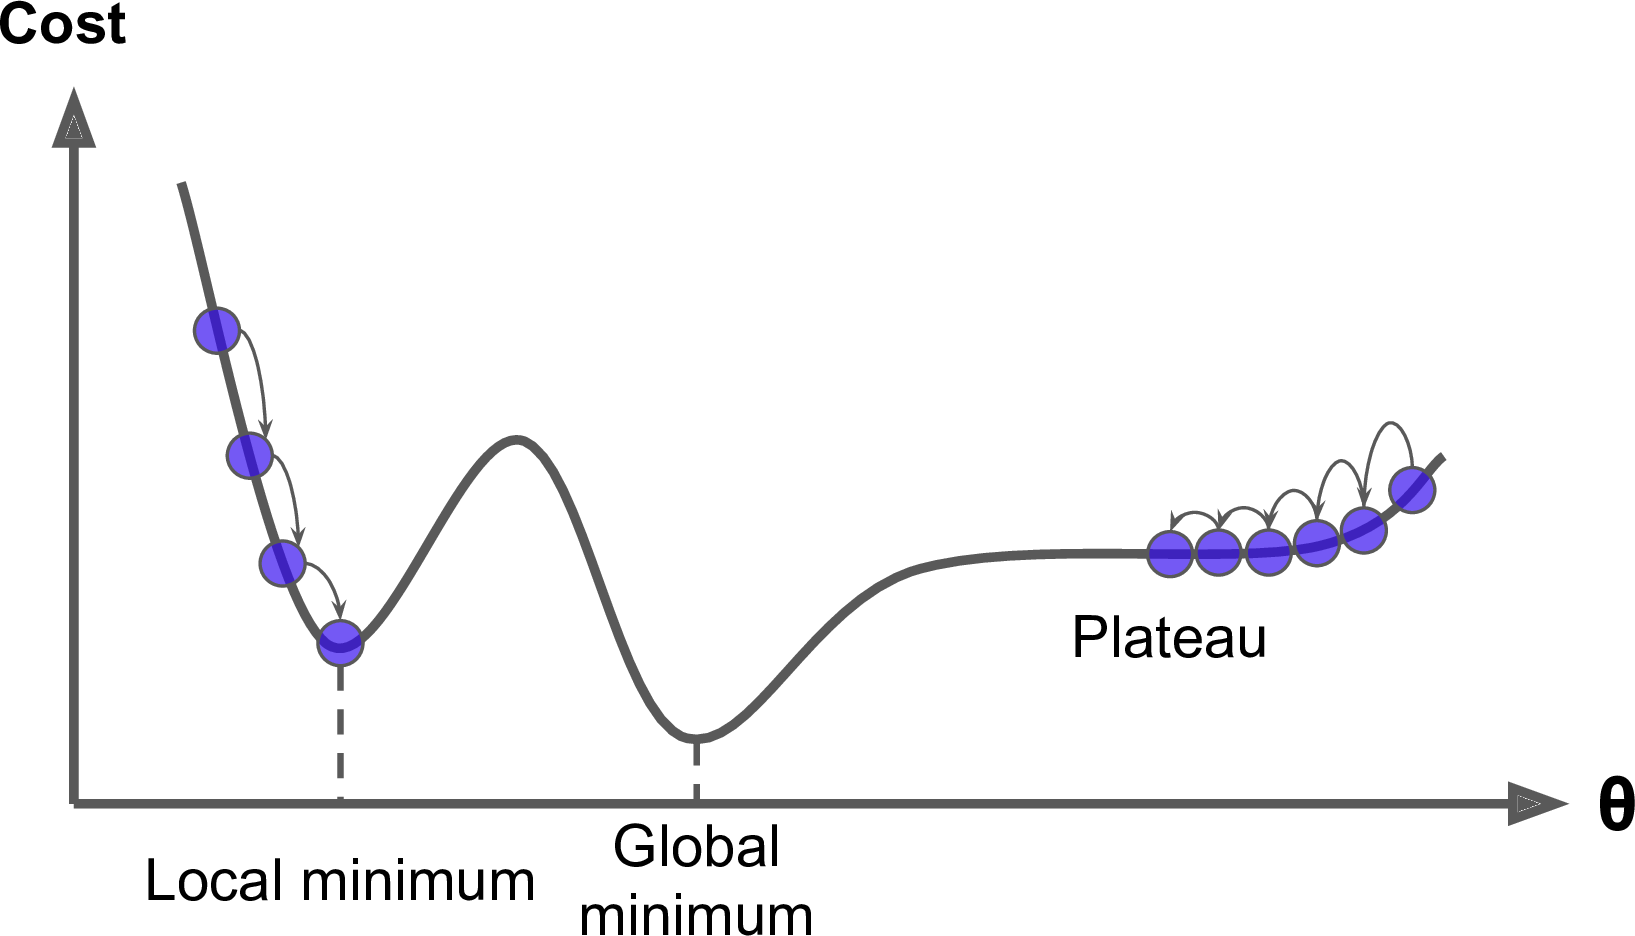

Fortunately, the <font color='blue'> **MSE cost function for a Linear Regression model** happens to be a
**convex function**</font>, 
which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. 
This implies that 
- <font color='blue'>  there are **no local
minima**, just one global minimum</font>. 

- It is also a <font color='blue'> **continuous function**</font> with a slope that
never changes abruptly. 

These two facts have a great consequence: <font color='blue'> **Gradient Descent
is guaranteed** to approach arbitrarily close **the global minimum** </font> (if you wait long
enough and if the learning rate is not too high).

In fact, the <font color='blue'> cost function has the shape of a bowl</font>, but it can be an <font color='blue'> elongated bowl</font> if the <font color='blue'> features have very different scales</font>. The figure shows Gradient Descent on a training set where features 1 and 2 have the same scale (on the left), and on a training set
where feature 1 has much smaller values than feature 2 (on the right).

Gradient Descent with and without feature scaling:
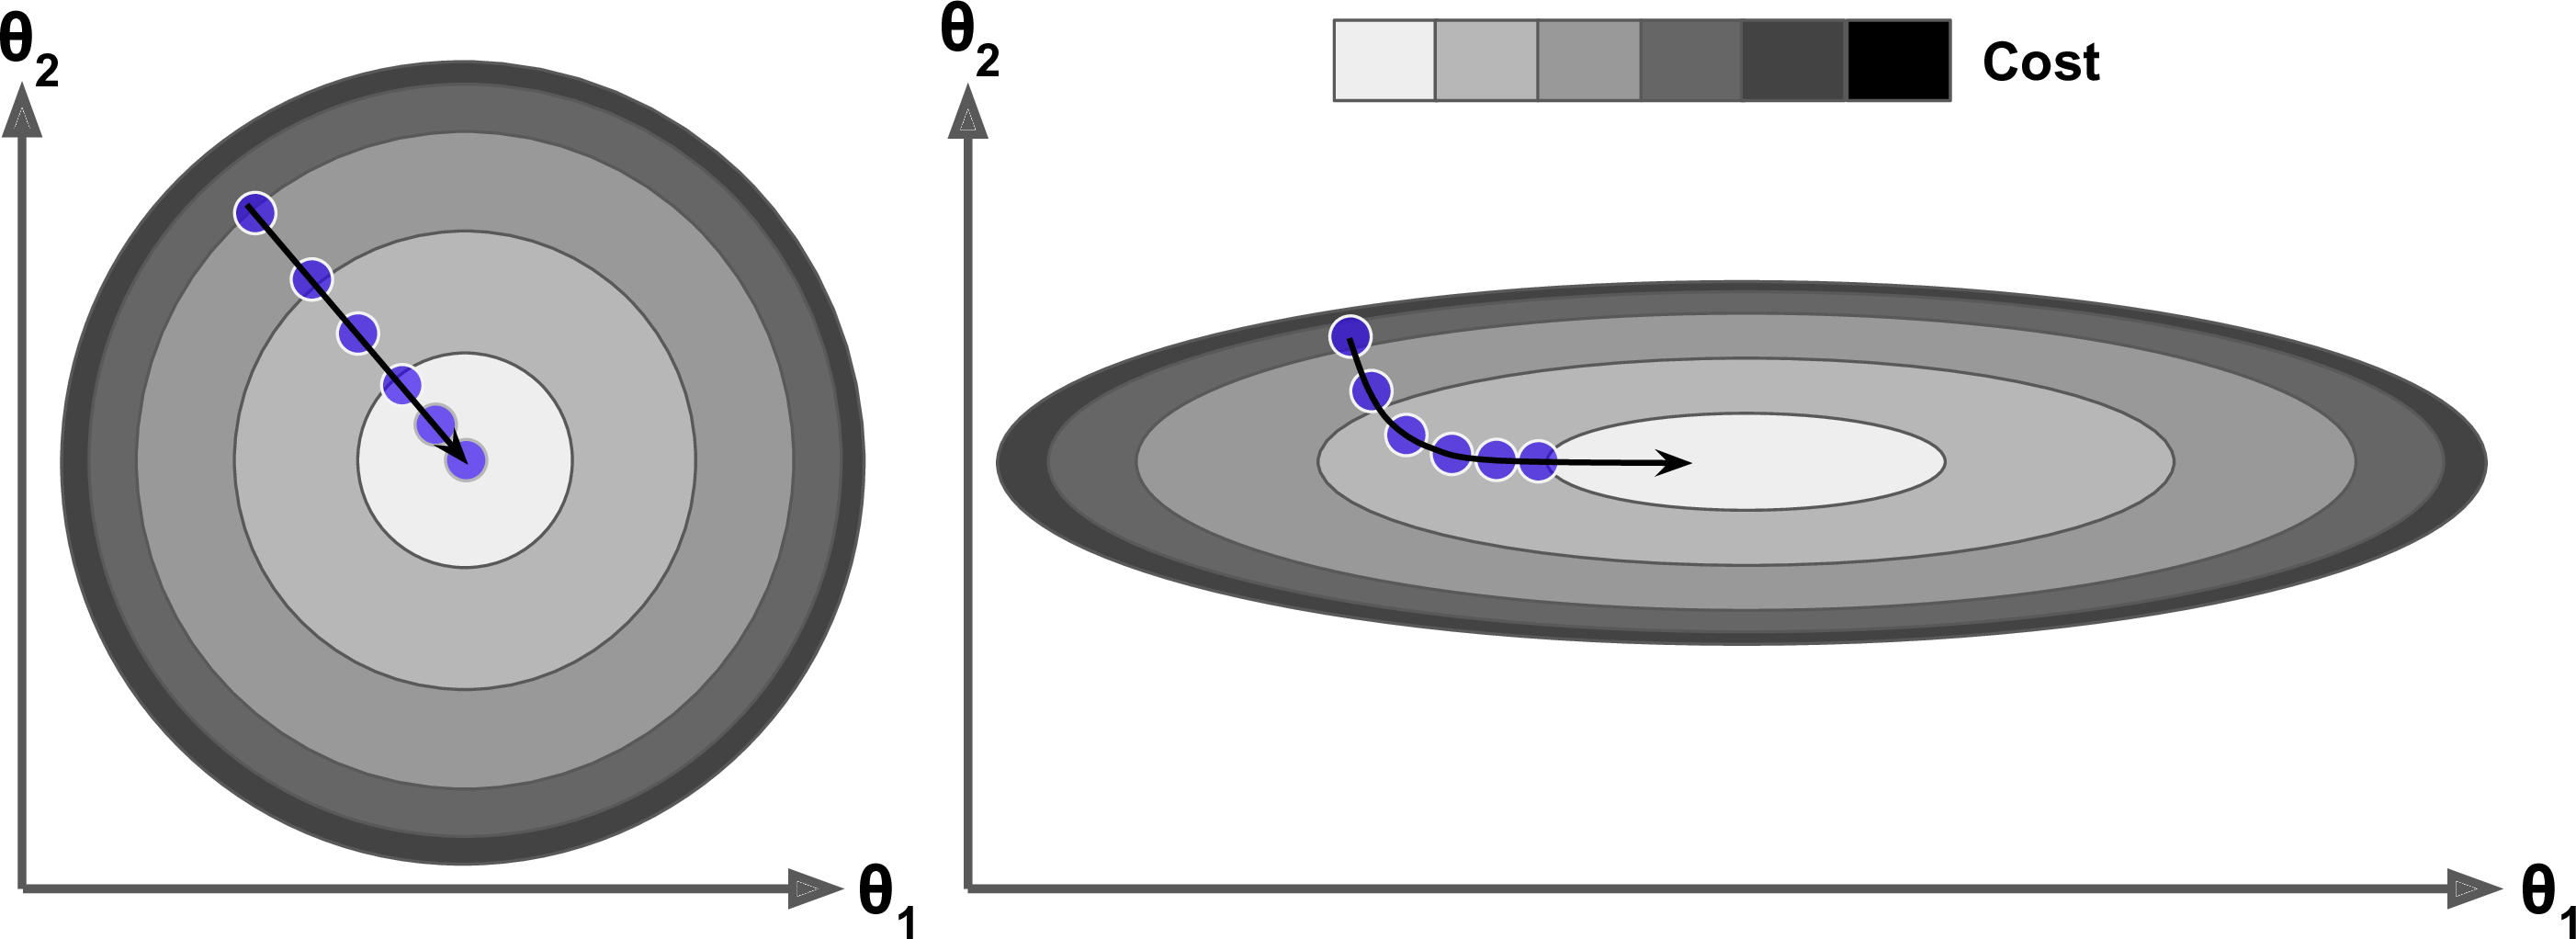

As you can see, 

- <font color='blue'> on the left the Gradient Descent algorithm </font> goes straight toward <font color='blue'> the minimum</font>, thereby reaching it <font color='blue'> quickly</font>,

- whereas <font color='blue'> on the right</font> it will eventually reach the minimum, but <font color='blue'> it will
take a long time</font>.

>**When using Gradient Descent, you should ensure that all features
have a similar scale** (e.g., using Scikit-Learn’s StandardScaler
class), or else it will take much longer to converge.

Gradient Descent algorithms:

- Batch Gradient Descent
- Stochastic Gradient Descent
- Mini-batch Gradient Descent

**Batch Gradient Descent**

To implement Gradient Descent, you <font color='blue'> need to compute the gradient of the cost function with regards to each model parameter $\theta_j$ </font> (Partial derivatives of the cost function):

$$\frac{\partial}{\partial \theta_{j}} \operatorname{MSE}(\theta)=\frac{2}{m} \sum_{i=1}^{m}\left(\boldsymbol{\theta}^{T} \mathbf{x}^{(i)}-y^{(i)}\right) x_{j}^{(i)}$$

Instead of computing these partial derivatives individually, you can  compute the <font color='blue'> gradient vector</font>, noted $\nabla_{\boldsymbol{\theta}} \operatorname{MSE}(\boldsymbol{\theta})$, contains all the partial derivatives of the cost function (one for each model parameter).

$$\nabla_{\boldsymbol{\theta}} \operatorname{MSE}(\boldsymbol{\theta})=\left(\begin{array}{c}
\frac{\partial}{\partial \theta_{0}} \operatorname{MSE}(\boldsymbol{\theta}) \\
\frac{\partial}{\partial \theta_{1}} \operatorname{MSE}(\boldsymbol{\theta}) \\
\vdots \\
\frac{\partial}{\partial \theta_{n}} \operatorname{MSE}(\boldsymbol{\theta})
\end{array}\right)=\frac{2}{m} \mathbf{X}^{T}(\mathbf{X} \boldsymbol{\theta}-\mathbf{y})$$

>**Notice that this formula involves calculations over the full training set $\mathbf{X}$, at each Gradient Descent step! 
This is why the algorithm is called Batch Gradient Descent**: it uses the whole batch of training
data at every step (actually, Full Gradient Descent would probably
be a better name). As a result it is terribly slow on very large training
sets (but we will see much faster Gradient Descent algorithms
shortly). However, Gradient Descent scales well with the number of
features; training a Linear Regression model when there are hundreds
of thousands of features is much faster using Gradient
Descent than using the Normal Equation or SVD decomposition.

Once you have the <font color='blue'> gradient vector, which points uphill, just go in the opposite direction to go downhill</font>. This means subtracting $\nabla_{\boldsymbol{\theta}} \operatorname{MSE}(\boldsymbol{\theta})$ from $\boldsymbol{\theta}$. This is where the <font color='blue'> learning rate $\eta$</font> comes into play: multiply the gradient vector by $\eta$ to determine the
size of the downhill step:

$$\boldsymbol{\theta}^{(\text {next step })}=\boldsymbol{\theta}-\eta \nabla_{\boldsymbol{\theta}} \operatorname{MSE}(\boldsymbol{\theta})$$

### Stochastic Gradient Descent

The <font color='blue'> main problem with Batch Gradient Descent </font> is the fact that <font color='blue'> it uses the whole
training set to compute the gradients at every step</font>, 
which makes it very slow when the training set is large. At the opposite extreme, <font color='blue'> Stochastic Gradient Descent  </font> just picks <font color='blue'> a random instance in the training set at every step and computes the gradients
based only on that single instance</font>.

$$\frac{\partial}{\partial \theta_{j}} \operatorname{MSE}^{(i)}(\theta)=2 \left(\boldsymbol{\theta}^{T} \mathbf{x}^{(i)}-y^{(i)}\right) x_{j}^{(i)}$$

$$\nabla_{\boldsymbol{\theta}} \operatorname{MSE}^{(i)}(\boldsymbol{\theta})=\left(\begin{array}{c}
\frac{\partial}{\partial \theta_{0}} \operatorname{MSE}^{(i)}(\boldsymbol{\theta}) \\
\frac{\partial}{\partial \theta_{1}} \operatorname{MSE}^{(i)}(\boldsymbol{\theta}) \\
\vdots \\
\frac{\partial}{\partial \theta_{n}} \operatorname{MSE}^{(i)}(\boldsymbol{\theta})
\end{array}\right)=2 \left(\boldsymbol{\theta}^{T} \mathbf{x}^{(i)}-y^{(i)}\right) \mathbf{x}^{(i)}$$

- Obviously <font color='blue'> this makes the algorithm much faster </font> since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm)

- On the other hand, <font color='blue'> due to its stochastic (i.e., random) nature</font>, this algorithm is <font color='blue'> much less regular than Batch Gradient Descent</font>: instead of gently decreasing until it reaches
the minimum, <font color='blue'> the cost function will bounce up and down, decreasing only on average</font>.
Over time it will end up very close to the minimum, but once it gets there it will
continue to bounce around, never settling down. <font color='blue'> So once the algorithm stops, the final parameter values are good, but not optimal</font>.


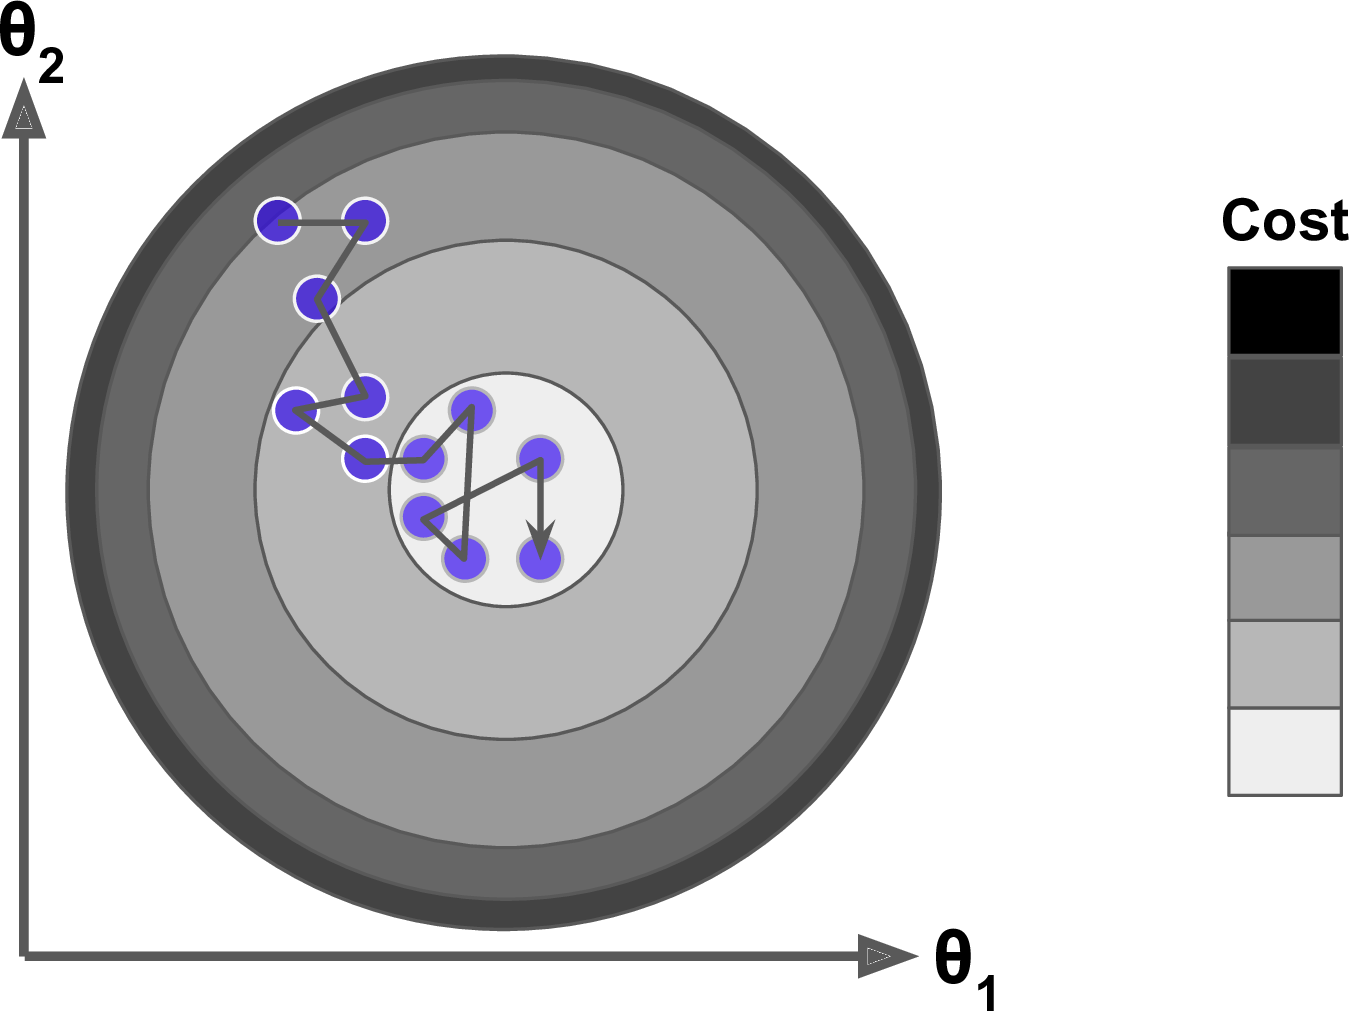

When the cost function is very irregular, this can actually <font color='blue'> help the algorithm jump out of local minima</font>, so Stochastic Gradient Descent has a better
chance of finding the global minimum than Batch Gradient Descent does.

Therefore <font color='blue'> randomness</font> 

- is good to escape from local optima, 

- but bad because it means that the <font color='blue'> algorithm can never settle at the minimum</font>. 

One <font color='blue'> solution to this dilemma</font> is
to <font color='blue'> gradually reduce the learning rate</font>:

- The steps start out large (which helps make quick progress and escape local minima), 

- then get smaller and smaller, allowing the algorithm to settle at the global minimum. 

This process is <font color='blue'> akin to simulated annealing</font>, an algorithm inspired from the process of annealing in metallurgy where molten
metal is slowly cooled down. 

The <font color='blue'> function</font> that determines the <font color='blue'> learning rate</font> at each
iteration is called the <font color='blue'> learning schedule</font>. If the learning rate is reduced too quickly, you
may get stuck in a local minimum, or even end up frozen halfway to the minimum. If
the learning rate is reduced too slowly, you may jump around the minimum for a
long time and end up with a suboptimal solution if you halt training too early.

By convention we iterate by rounds of <font color='blue'> m iterations</font>; each round is called an <font color='blue'> **epoch**</font>.

While the Batch Gradient Descent code iterated 1,000 times through the whole training
set, this code goes through the training set only 50 times and reaches a fairly good
solution:

To perform Linear Regression using SGD with Scikit-Learn, you can use the `SGDRegressor` class, which defaults to optimizing the squared error cost function. 

The following code runs for 
- maximum 1000 epochs (`max_iter=1000`) or until the loss drops by less than 1e-3 during one epoch (`tol=1e-3`), 
- starting with a learning rate of 0.1
(`eta0=0.1`), 
- using the default learning schedule (different from the preceding one),
- and it does not use any regularization (penalty=None; more details on this shortly):

**Mini-batch Gradient Descent**

Mini-batch Gradient Descent:

It is quite simple to understand once you know <font color='blue'> Batch and Stochastic Gradient
Descent</font>: at each step, instead of computing the gradients based on the full training
set (as in Batch GD) or based on just one instance (as in Stochastic GD), <font color='blue'> Minibatch
GD computes the gradients **on small random sets of instances** called **minibatches**</font>.

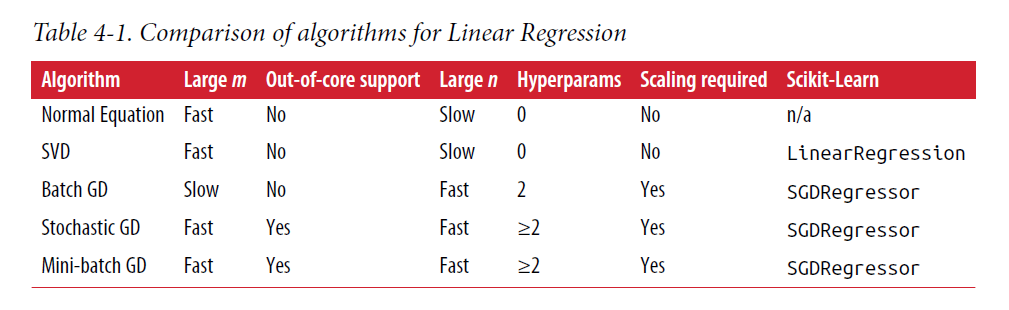